In [1]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff


In [2]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOTM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory' : 'Age_Category'},errors="raise")
cNames = list(survey_raw.columns.values)
checkList = ['Prefecture_code','TypeOfRes','Sex','Age','Age_Catagory','Sex_Era','Married','Profession','House_Status','Household_Status','Grocery_Budget_Strictness']
cur_pivot = survey_raw.pivot_table("dummy",index = "LOTM",columns = 'Grocery_Budget_Strictness',aggfunc = sum)
cur_pivot = cur_pivot.fillna(0)

In [3]:
temp_raw = survey_raw.groupby("Married")
Married_raw = temp_raw.get_group(2)
Unmarried_raw = temp_raw.get_group(1)
Married_Age_Catagory_LOTM = Married_raw.pivot_table("dummy",index = "LOTM",columns = "Age_Category" ,aggfunc = sum)
Unmarried_Age_Catagory_LOTM = Unmarried_raw.pivot_table("dummy",index = "LOTM",columns = "Age_Category" ,aggfunc = sum)
married_total = Married_raw.sum()
married_total = married_total["dummy"]
unmarried_total = Unmarried_raw.sum()
unmarried_total = unmarried_total["dummy"]
married_Age_Catagory_LOTM_per = Married_Age_Catagory_LOTM/married_total
unmarried_Age_Catagory_LOTM_per = Unmarried_Age_Catagory_LOTM/unmarried_total

 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

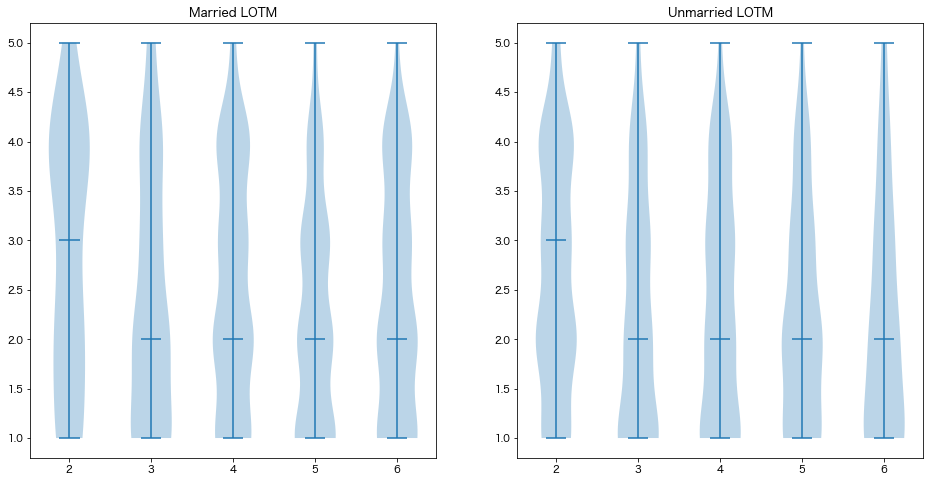

In [4]:
# Marriage VIOLIN PLOT USED IN PAPER#
married_violin = []
unmarried_violin = []
cur = 1
for each in Married_Age_Catagory_LOTM:
    temp = []
    for i in Married_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(i):
            temp.append(cur)
        cur+=1
    married_violin.append(temp)


for each in Unmarried_Age_Catagory_LOTM:
    temp = []
    for i in Unmarried_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(i):
            temp.append(cur)
        cur+=1
    unmarried_violin.append(temp)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(married_violin,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Married LOTM')

axs[1].violinplot(unmarried_violin,
                  showmeans=False,
                  showmedians=True)
axs[1].set_title('Unmarried LOTM')

plt.setp(axs,xticks=[y + 1 for y in range(len(married_violin))],xticklabels=['2','3', '4', '5', '6'])

In [5]:
temp_raw = survey_raw.groupby("Sex")
female_raw = temp_raw.get_group(2)
male_raw = temp_raw.get_group(1)
female_Age_Catagory_LOTM = female_raw.pivot_table("dummy",index = "LOTM",columns = "Age_Category" ,aggfunc = sum)
male_Age_Catagory_LOTM = male_raw.pivot_table("dummy",index = "LOTM",columns = "Age_Category" ,aggfunc = sum)
female_total = female_raw.sum()
female_total = female_total["dummy"]
male_total = male_raw.sum()
male_total = male_total["dummy"]
female_Age_Catagory_LOTM_per = female_Age_Catagory_LOTM/female_total
male_Age_Catagory_LOTM_per = male_Age_Catagory_LOTM/male_total

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')
female_Age_Catagory_LOTM_per[4] 

LOTM
1    0.061617
2    0.066752
3    0.051348
4    0.057766
5    0.008986
Name: 4, dtype: float64

 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

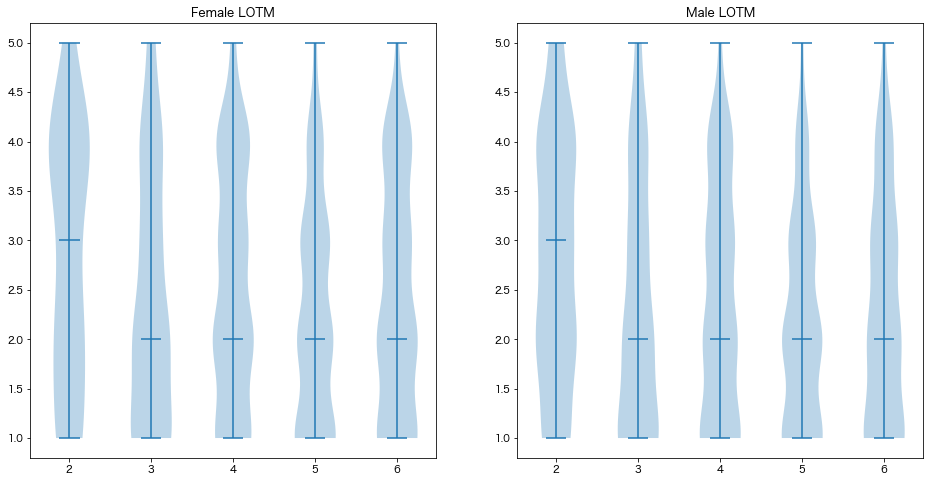

In [11]:
# Marriage VIOLIN PLOT USED IN PAPER#
male_violin = []
female_violin = []
cur = 1
for each in female_Age_Catagory_LOTM:
    temp = []
    for i in Married_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(i):
            temp.append(cur)
        cur+=1
    female_violin.append(temp)


for each in male_Age_Catagory_LOTM_per:
    temp = []
    for i in male_Age_Catagory_LOTM[each]:
        if cur == 6:
            cur = 1
        for j in range(i):
            temp.append(cur)
        cur+=1
    male_violin.append(temp)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].violinplot(female_violin,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Female LOTM')

axs[1].violinplot(male_violin,
                  showmeans=False,
                  showmedians=True)
axs[1].set_title('Male LOTM')

plt.setp(axs,xticks=[y + 1 for y in range(len(married_violin))],xticklabels=['2','3', '4', '5', '6'])

In [24]:
temp_raw = survey_raw.groupby("Profession")
all_job_raw = []
for i in range(1,11):
    if i == 5:
        pass
    elif i == 10:
        all_job_raw.append(temp_raw.get_group(99))
    else:
        all_job_raw.append(temp_raw.get_group(i))
all_job_LOTM = []
for each in all_job_raw:
    all_job_LOTM.append(each.pivot_table("dummy",index = "LOTM",columns = "Age_Category" ,aggfunc = sum))

# married_total = Married_raw.sum()
# married_total = married_total["dummy"]
# unmarried_total = Unmarried_raw.sum()
# unmarried_total = unmarried_total["dummy"]
# married_Age_Catagory_LOTM_per = Married_Age_Catagory_LOTM/married_total
# unmarried_Age_Catagory_LOTM_per = Unmarried_Age_Catagory_LOTM/unmarried_total


In [78]:
job = {0:"Salary Man",1:"Self Employed",2:"Profressional(Doctor,Laywer,etc)",3:"Civil Servent",4:"Student",5:"Housewife/Househusband",6:"Parttime",7:"Retired",8:"Others"}


 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

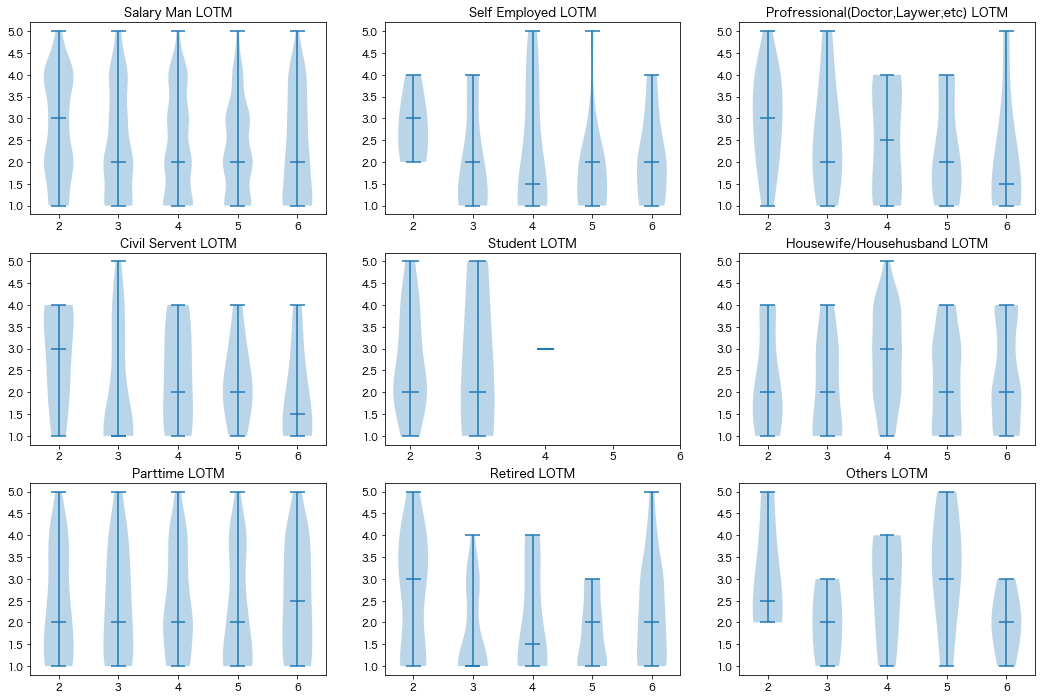

In [88]:
all_violin_master = []
cur = 1

for each_pos_LOTM in all_job_LOTM:
    each_pos_LOTM = each_pos_LOTM.fillna(0)
    all_violin = []
    for each in each_pos_LOTM:
        temp = []
        for i in each_pos_LOTM[each]:
            if cur == 6:
                cur = 1
            for j in range(int(i)):
                temp.append(cur)
            cur+=1
        all_violin.append(temp)
        
    all_violin_master.append(all_violin)


# for each in Unmarried_Age_Catagory_LOTM:
#     temp = []
#     for i in Unmarried_Age_Catagory_LOTM[each]:
#         if cur == 6:
#             cur = 1
#         for j in range(i):
#             temp.append(cur)
#         cur+=1
#     unmarried_violin.append(temp)
    
xlabel = ["2","3","4","5","6"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
counter = 0
for i in range(3):
    for j in range(3):
        axs[i][j].violinplot(all_violin_master[counter],
                          showmeans=False,
                          showmedians=True)
        axs[i][j].set_title('{} LOTM'.format(job[counter] ))
        counter+=1


# axs[1].violinplot(male_violin,
#                   showmeans=False,
#                   showmedians=True)


plt.setp(axs,xticks=[y + 1 for y in range(len(married_violin))],xticklabels=['2','3', '4', '5', '6'])



Text(0, 0.5, 'Population Size')

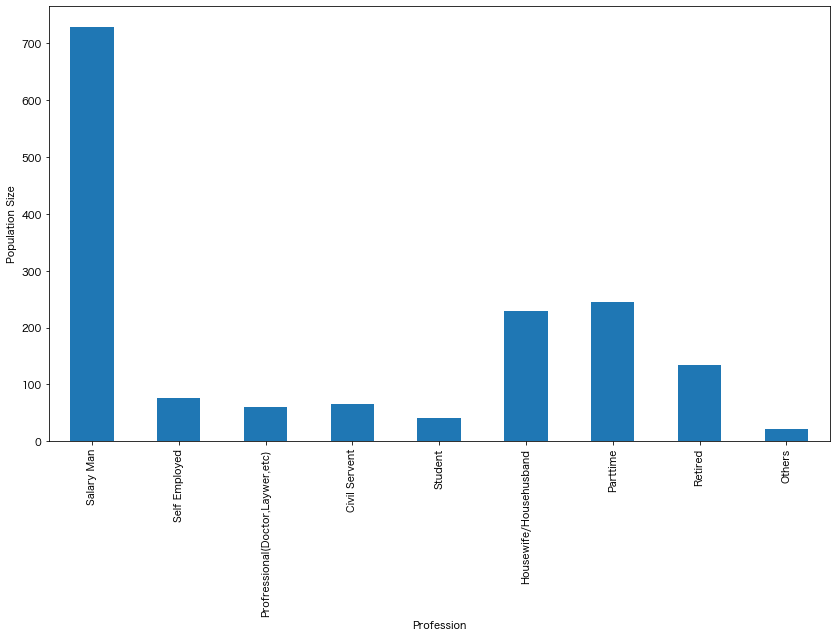

In [107]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 8))
temp_raw = survey_raw.groupby("Profession").sum()
temp_raw["dummy"].plot(kind = "bar")
plt.setp(axs,xticks=[y for y in range(9)],xticklabels=[job[i] for i in range(9)])
plt.ylabel("Population Size")